**QUESTION 3** - Binary Search Tree

**Provide an add method that inserts a single numeric value at a time according to the rules for a binary search tree (10 points)**

In [1]:
class Tree:
    def __init__(self):
        self._value = None
        self.left = None
        self.right = None
    
    
    def add(self, item):
        if self._value is None:
            self._value = item    
            
        else:  
            if item < self._value:
                if self.left is not None:
                        self.left.add_to_tree(item, self.left)
                else:
                    self.left = Tree()
                    self.left._value = item

            else:            
                if self.right is not None:
                        self.right.add_to_tree(item, self.right)
                else:
                    self.right = Tree()
                    self.right._value = item       

    
    def add_to_tree(self, item, tree):
        if item < tree._value:
            if tree.left is not None:
                tree.left.add_to_tree(item, tree.left)
            else:
                tree.left = Tree()
                tree.left.add(item)
                    
        else:            
            if tree.right is not None:
                    tree.right.add_to_tree(item, tree.right)
            else:
                tree.right = Tree()
                tree.right.add(item)       

              
    def __contains__(self, item): 
        if self._value == item:
            return True

        elif self.left and item < self._value:
            return item in self.left

        elif self.right and item > self._value:
            return item in self.right

        else:
            return False

        
    def printtree(self):
        
        if self.left:
            self.left.printtree()
        print( self._value),
        
        if self.right:
             self.right.printtree()


In [2]:
my_tree = Tree()

for item in [55, 62, 37, 49, 71, 14, 17]:
     my_tree.add(item)

In [3]:
my_tree.printtree()

14
17
37
49
55
62
71


**Add the following *__contains__* method and test (5 points)**

In [4]:
my_tree.__contains__(55)

True

In [5]:
my_tree.__contains__(42)

False

In [6]:
my_tree.__contains__(37)

True

In [7]:
my_tree.__contains__(237)

False

**Using various sizes n of trees (populated with random data) and sufficiently many calls to in (each individual call should be very fast, so you may have to run many repeated tests), demonstrate that in is executing in O(log n) times  
On a log-log plot, for sufficiently large n, the graph of time required for checking if a number is in the tree as a function of n should be visibly starting to flatten. (5 points).**

In [8]:
n_range = []

for i in range(0,7):
    n_range.append(10**i)
    

In [9]:
import numpy as np
import time

time_contains_set = []
time_builds_set = []

searching_set = np.random.randint(-1000, 1000, 1000)

for n in n_range:
    
    print(n)
    input_number = np.random.randint(-1000, 1000, n)
    
    
    
    
    t_start = time.perf_counter()
    
    my_tree = Tree()
        
    for item in input_number:
        my_tree.add(item)

    t_end = time.perf_counter()
        
    timer_builds = t_end - t_start
    
    time_builds_set.append(timer_builds)
    
    
    
    
    timer_contains = 0
    
    for item in searching_set:
        
        t_start = time.perf_counter()
        my_tree.__contains__(item)
        t_end = time.perf_counter()
        
        timer_contains = timer_contains + (t_end-t_start)
    
    
    time_contains_set.append(timer_contains/1000)

1
10
100
1000
10000
100000
1000000


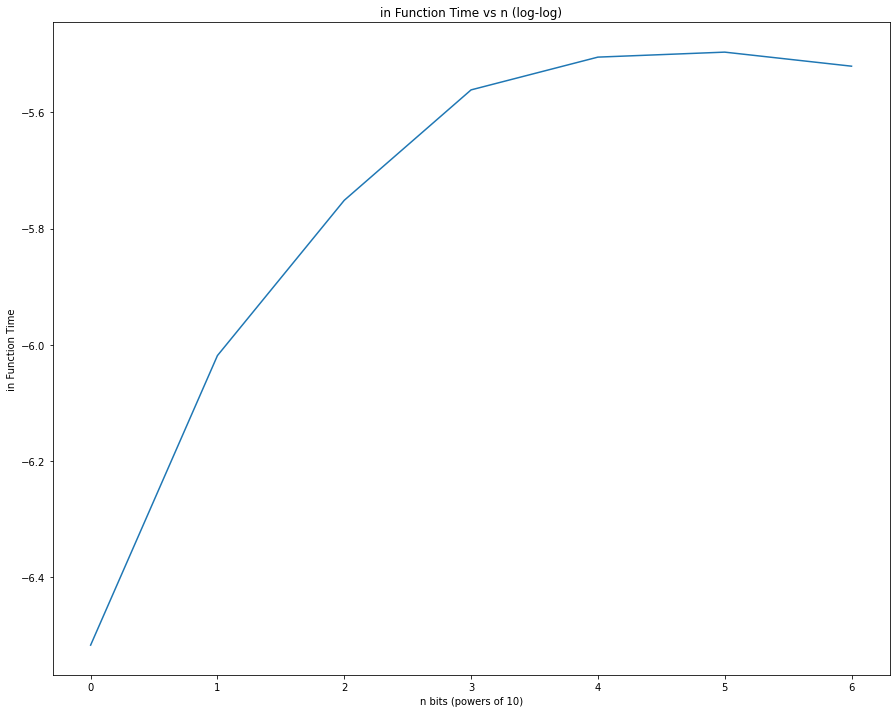

In [18]:
import matplotlib.pyplot as plt

time_set_log_1 = np.log10(time_contains_set)
n_log = np.log10(n_range)

plt.figure(figsize=(15, 12))

plt.plot(n_log, time_set_log_1)

plt.title('in Function Time vs n (log-log)')
plt.xlabel('n bits (powers of 10)')
plt.ylabel('in Function Time')

plt.show()

As can be seen, in is executing in O(logn) time.

**Provide supporting evidence that the time to setup the tree is O(n log n) by timing it for various sized ns and showing that the runtime lies between a curve that is O(n) and one that is O(n\*\*2). (5 points)**

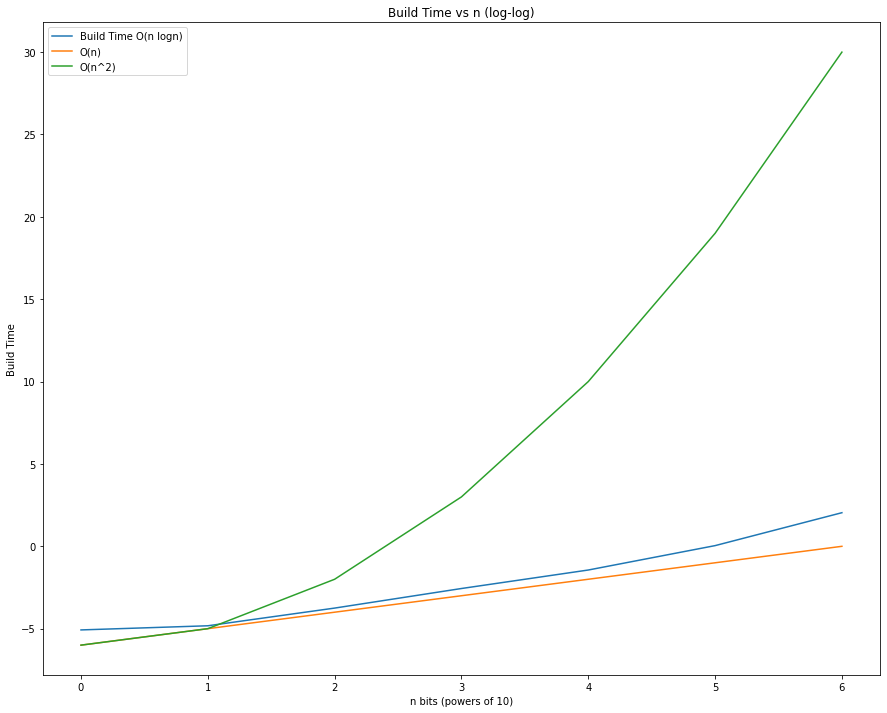

In [31]:
import matplotlib.pyplot as plt

time_set_log_2 = np.log10(time_builds_set)
n_log_s = np.square(n_log)   

plt.figure(figsize=(15, 12))

plt.plot(n_log, time_set_log_2, label = 'Build Time O(n logn)')
plt.plot(n_log, n_log-6, label = 'O(n)')
plt.plot(n_log, n_log_s-6, label = 'O(n^2)')

plt.title('Build Time vs n (log-log)')
plt.xlabel('n bits (powers of 10)')
plt.ylabel('Build Time')
plt.legend()
plt.show()


As can be seen, since the curve lines between O(n) and 0(n^2), the runtime is at O(n logn) to setup the tree.